**03-01 선형회귀**

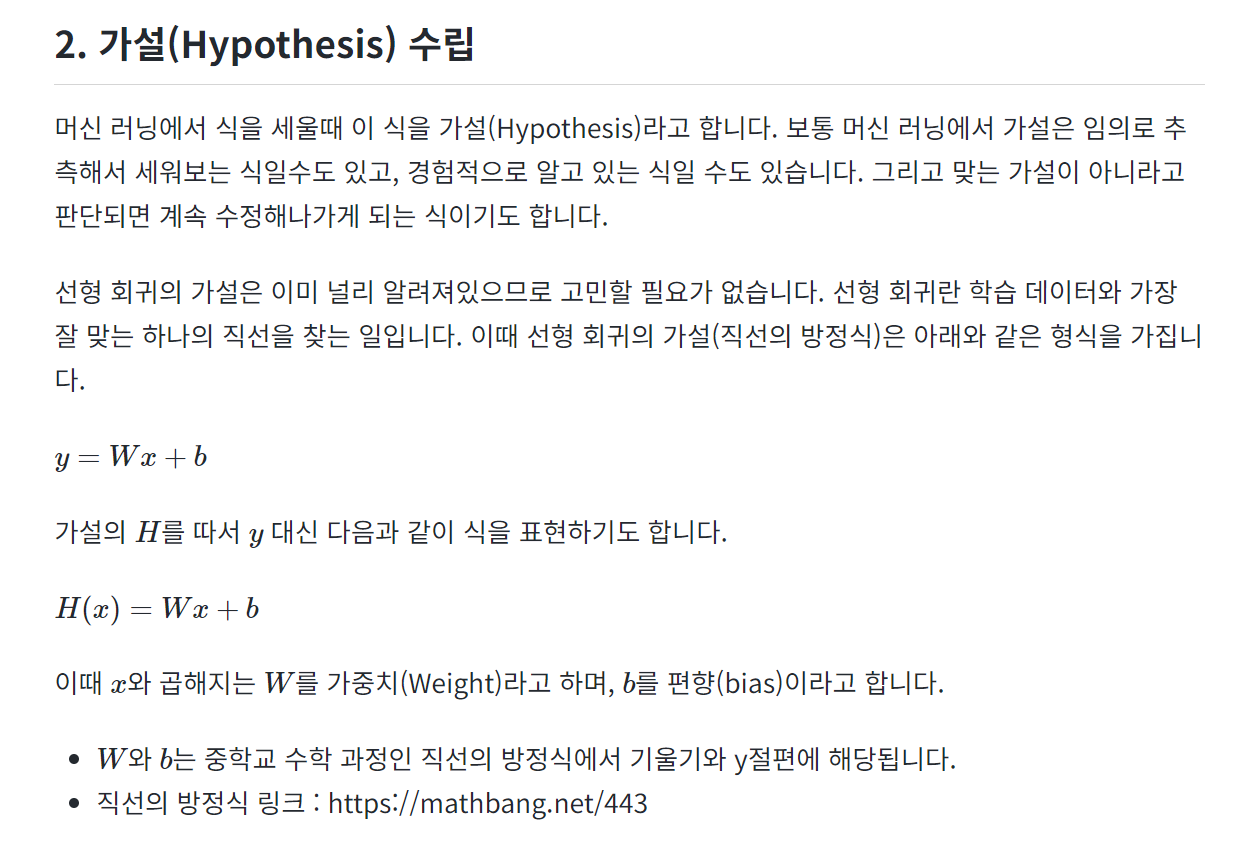

* 비용함수(cost function)
* 옵티마이저(최적화 알고리즘) - 경사하강법


In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
torch.manual_seed(1)

x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

print(x_train)
print(x_train.shape)

tensor([[1.],
        [2.],
        [3.]])
torch.Size([3, 1])


In [2]:
print(y_train)
print(y_train.shape)

tensor([[2.],
        [4.],
        [6.]])
torch.Size([3, 1])


In [4]:
W = torch.zeros(1, requires_grad = True)
print(W)

tensor([0.], requires_grad=True)


In [5]:
b = torch.zeros(1, requires_grad = True)
print(b)

tensor([0.], requires_grad=True)


In [6]:
hypothesis = x_train * W +b
print(hypothesis)

tensor([[0.],
        [0.],
        [0.]], grad_fn=<AddBackward0>)


In [7]:
cost = torch.mean((hypothesis - y_train)**2)
print(cost)

tensor(18.6667, grad_fn=<MeanBackward0>)


In [8]:
optimizer = optim.SGD([W,b], lr=0.01)

optimizer.zero_grad()

cost.backward()

optimizer.step()

In [12]:
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])

W = torch.zeros(1, requires_grad = True)

b = torch.zeros(1, requires_grad = True)

optimizer = optim.SGD([W,b], lr=0.01)

nb_epochs = 2000
for epoch in range(nb_epochs + 1):
    hypothesis = x_train * W +b
    cost = torch.mean((hypothesis - y_train)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()
    if epoch % 100 == 0:
        print('Epoch {:4d}/{} W: {:.3f}, b: {:.3f} Cost:{:.6f}'.format(
            epoch, nb_epochs, W.item(), b.item(), cost.item()
        ))

Epoch    0/2000 W: 0.187, b: 0.080 Cost:18.666666
Epoch  100/2000 W: 1.746, b: 0.578 Cost:0.048171
Epoch  200/2000 W: 1.800, b: 0.454 Cost:0.029767
Epoch  300/2000 W: 1.843, b: 0.357 Cost:0.018394
Epoch  400/2000 W: 1.876, b: 0.281 Cost:0.011366
Epoch  500/2000 W: 1.903, b: 0.221 Cost:0.007024
Epoch  600/2000 W: 1.924, b: 0.174 Cost:0.004340
Epoch  700/2000 W: 1.940, b: 0.136 Cost:0.002682
Epoch  800/2000 W: 1.953, b: 0.107 Cost:0.001657
Epoch  900/2000 W: 1.963, b: 0.084 Cost:0.001024
Epoch 1000/2000 W: 1.971, b: 0.066 Cost:0.000633
Epoch 1100/2000 W: 1.977, b: 0.052 Cost:0.000391
Epoch 1200/2000 W: 1.982, b: 0.041 Cost:0.000242
Epoch 1300/2000 W: 1.986, b: 0.032 Cost:0.000149
Epoch 1400/2000 W: 1.989, b: 0.025 Cost:0.000092
Epoch 1500/2000 W: 1.991, b: 0.020 Cost:0.000057
Epoch 1600/2000 W: 1.993, b: 0.016 Cost:0.000035
Epoch 1700/2000 W: 1.995, b: 0.012 Cost:0.000022
Epoch 1800/2000 W: 1.996, b: 0.010 Cost:0.000013
Epoch 1900/2000 W: 1.997, b: 0.008 Cost:0.000008
Epoch 2000/2000 W: 

**03-02 자동 미분(Autograd)**

In [14]:
w = torch.tensor(2.0, requires_grad=True)
y = w**2
z = 2*y + 5

z.backward()

In [15]:
print('수식을 w로 미분한 값 : {}'.format(w.grad))

수식을 w로 미분한 값 : 8.0


z = 2*(w^2)+5   
1)w로 1번 미분   
z = 4w   
w.grad에 w가 속한 수식을 w로 미분했을때 계수가 저장됨   
w.grad = 4   
2)w로 2번 미분   
z = 4   
w.grad = 8




**03-03 다중 선형 회귀**

In [16]:
# 훈련 데이터
x1_train = torch.FloatTensor([[73], [93], [89], [96], [73]])
x2_train = torch.FloatTensor([[80], [88], [91], [98], [66]])
x3_train = torch.FloatTensor([[75], [93], [90], [100], [70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

w1 = torch.zeros(1, requires_grad = True)
w2 = torch.zeros(1, requires_grad = True)
w3 = torch.zeros(1, requires_grad = True)
b = torch.zeros(1, requires_grad = True)
optimizer = optim.SGD([w1, w2, w3, b], lr = 1e-5)

nb_epochs = 1000
for epoch in range(nb_epochs + 1):
    hypothesis = x1_train*w1 + x2_train*w2 + x3_train*w3 + b
    cost = torch.mean((y_train - hypothesis)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} w1: {:.3f} w2: {:.3f} w3: {:.3f} b: {:.3f} Cost: {:.6f}'.format(
            epoch, nb_epochs, w1.item(), w2.item(), w3.item(), b.item(), cost.item()
        ))


Epoch    0/1000 w1: 0.294 w2: 0.294 w3: 0.297 b: 0.003 Cost: 29661.800781
Epoch  100/1000 w1: 0.674 w2: 0.661 w3: 0.676 b: 0.008 Cost: 1.563628
Epoch  200/1000 w1: 0.679 w2: 0.655 w3: 0.677 b: 0.008 Cost: 1.497595
Epoch  300/1000 w1: 0.684 w2: 0.649 w3: 0.677 b: 0.008 Cost: 1.435044
Epoch  400/1000 w1: 0.689 w2: 0.643 w3: 0.678 b: 0.008 Cost: 1.375726
Epoch  500/1000 w1: 0.694 w2: 0.638 w3: 0.678 b: 0.009 Cost: 1.319507
Epoch  600/1000 w1: 0.699 w2: 0.633 w3: 0.679 b: 0.009 Cost: 1.266222
Epoch  700/1000 w1: 0.704 w2: 0.627 w3: 0.679 b: 0.009 Cost: 1.215703
Epoch  800/1000 w1: 0.709 w2: 0.622 w3: 0.679 b: 0.009 Cost: 1.167810
Epoch  900/1000 w1: 0.713 w2: 0.617 w3: 0.680 b: 0.009 Cost: 1.122429
Epoch 1000/1000 w1: 0.718 w2: 0.613 w3: 0.680 b: 0.009 Cost: 1.079390


In [17]:
x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  80],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

print(x_train.shape)
print(y_train.shape)

torch.Size([5, 3])
torch.Size([5, 1])


In [20]:
W = torch.zeros((3,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
optimizer = optim.SGD([W,b], lr = 1e-5)

nb_epochs = 20
for epoch in range(nb_epochs + 1):
    hypothesis = x_train.matmul(W) + b
    cost = torch.mean((y_train - hypothesis)**2)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    print('Epoch {:4d}/{} hypothesis: {} Cost: {:.6f}'.format(
        epoch, nb_epochs, hypothesis.squeeze().detach(), cost.item()
    ))

Epoch    0/20 hypothesis: tensor([0., 0., 0., 0., 0.]) Cost: 29661.800781
Epoch    1/20 hypothesis: tensor([66.7178, 80.1701, 76.1025, 86.0194, 61.1565]) Cost: 9537.694336
Epoch    2/20 hypothesis: tensor([104.5421, 125.6208, 119.2478, 134.7862,  95.8280]) Cost: 3069.590088
Epoch    3/20 hypothesis: tensor([125.9858, 151.3882, 143.7087, 162.4333, 115.4844]) Cost: 990.670288
Epoch    4/20 hypothesis: tensor([138.1429, 165.9963, 157.5768, 178.1071, 126.6283]) Cost: 322.481873
Epoch    5/20 hypothesis: tensor([145.0350, 174.2780, 165.4395, 186.9928, 132.9461]) Cost: 107.717064
Epoch    6/20 hypothesis: tensor([148.9423, 178.9730, 169.8976, 192.0301, 136.5279]) Cost: 38.687496
Epoch    7/20 hypothesis: tensor([151.1574, 181.6346, 172.4254, 194.8856, 138.5585]) Cost: 16.499043
Epoch    8/20 hypothesis: tensor([152.4131, 183.1435, 173.8590, 196.5043, 139.7097]) Cost: 9.365656
Epoch    9/20 hypothesis: tensor([153.1250, 183.9988, 174.6723, 197.4217, 140.3625]) Cost: 7.071114
Epoch   10/20 hyp

**03-04 nn.Module로 구현하는 선형 회귀 분석**

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
torch.manual_seed(1)
# 데이터
x_train = torch.FloatTensor([[1], [2], [3]])
y_train = torch.FloatTensor([[2], [4], [6]])
x_train.shape

torch.Size([3, 1])

In [2]:
model = nn.Linear(1,1)

print(list(model.parameters()))

[Parameter containing:
tensor([[0.5153]], requires_grad=True), Parameter containing:
tensor([-0.4414], requires_grad=True)]


In [3]:
optimizer = torch.optim.SGD(model.parameters(),lr=0.01)

nb_epochs = 2000

for epoch in range(nb_epochs +1):
    # H(x)
    prediction = model(x_train)

    cost = F.mse_loss(prediction, y_train)

    optimizer.zero_grad()

    cost.backward()

    optimizer.step()

    if epoch % 100 == 0:
        print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 13.103541
Epoch  100/2000 Cost: 0.002791
Epoch  200/2000 Cost: 0.001724
Epoch  300/2000 Cost: 0.001066
Epoch  400/2000 Cost: 0.000658
Epoch  500/2000 Cost: 0.000407
Epoch  600/2000 Cost: 0.000251
Epoch  700/2000 Cost: 0.000155
Epoch  800/2000 Cost: 0.000096
Epoch  900/2000 Cost: 0.000059
Epoch 1000/2000 Cost: 0.000037
Epoch 1100/2000 Cost: 0.000023
Epoch 1200/2000 Cost: 0.000014
Epoch 1300/2000 Cost: 0.000009
Epoch 1400/2000 Cost: 0.000005
Epoch 1500/2000 Cost: 0.000003
Epoch 1600/2000 Cost: 0.000002
Epoch 1700/2000 Cost: 0.000001
Epoch 1800/2000 Cost: 0.000001
Epoch 1900/2000 Cost: 0.000000
Epoch 2000/2000 Cost: 0.000000


In [4]:
new_var = torch.FloatTensor([[4.0]])

pred_y = model(new_var)

print("훈련 후 입력이 4일 때의 예측값 :", pred_y)

훈련 후 입력이 4일 때의 예측값 : tensor([[7.9989]], grad_fn=<AddmmBackward0>)


In [9]:
torch.manual_seed(1)

In [10]:
print(list(model.parameters()))

[Parameter containing:
tensor([[1.9994]], requires_grad=True), Parameter containing:
tensor([0.0014], requires_grad=True)]


In [11]:
print(pred_y)
print(new_var)
print(prediction)

tensor([[7.9989]], grad_fn=<AddmmBackward0>)
tensor([[4.]])
tensor([[2.0008],
        [4.0002],
        [5.9995]], grad_fn=<AddmmBackward0>)


In [12]:
# 데이터
x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])


In [13]:
mode1 = nn.Linear(3,1)
print(list(mode1.parameters()))

[Parameter containing:
tensor([[ 0.2975, -0.2548, -0.1119]], requires_grad=True), Parameter containing:
tensor([0.2710], requires_grad=True)]


In [15]:
optimizer = torch.optim.SGD(mode1.parameters(),lr = 1e-5)

In [17]:
nb_epochs = 2000

for epoch in range(nb_epochs+1):
    prediction = mode1(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
         print('Epoch {:4d}/{} Cost: {:.6f}'.format(
          epoch, nb_epochs, cost.item()
      ))

Epoch    0/2000 Cost: 31667.597656
Epoch  100/2000 Cost: 0.225993
Epoch  200/2000 Cost: 0.223911
Epoch  300/2000 Cost: 0.221941
Epoch  400/2000 Cost: 0.220059
Epoch  500/2000 Cost: 0.218271
Epoch  600/2000 Cost: 0.216575
Epoch  700/2000 Cost: 0.214950
Epoch  800/2000 Cost: 0.213413
Epoch  900/2000 Cost: 0.211952
Epoch 1000/2000 Cost: 0.210560
Epoch 1100/2000 Cost: 0.209232
Epoch 1200/2000 Cost: 0.207967
Epoch 1300/2000 Cost: 0.206761
Epoch 1400/2000 Cost: 0.205619
Epoch 1500/2000 Cost: 0.204522
Epoch 1600/2000 Cost: 0.203484
Epoch 1700/2000 Cost: 0.202485
Epoch 1800/2000 Cost: 0.201542
Epoch 1900/2000 Cost: 0.200635
Epoch 2000/2000 Cost: 0.199769


In [18]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = mode1(new_var)

In [19]:
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.2305]], grad_fn=<AddmmBackward0>)


In [21]:
print(list(mode1.parameters()))

[Parameter containing:
tensor([[0.9778, 0.4539, 0.5768]], requires_grad=True), Parameter containing:
tensor([0.2802], requires_grad=True)]


**03-05 클래스로 파이토치 모델 구현하기**

In [ ]:
mode1 = nn.Linear(1,1)

In [ ]:
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(1,1)
    def forward(self, x):
        return self.linear(x)

model = LinearRegressionModel()



In [24]:
torch.manual_seed(1)

x_train = torch.FloatTensor([[73, 80, 75],
                             [93, 88, 93],
                             [89, 91, 90],
                             [96, 98, 100],
                             [73, 66, 70]])
y_train = torch.FloatTensor([[152], [185], [180], [196], [142]])

class MultivariateLinearRegressionModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(3,1)

    def forward(self, x):
        return self.linear(x)


model = MultivariateLinearRegressionModel()

optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 2000

for epoch in range(nb_epochs):
    prediction = model(x_train)
    cost = F.mse_loss(prediction, y_train)
    optimizer.zero_grad()
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print("Epoch : {:4d}/{} Cost : {:.6f}".format(
            epoch, nb_epochs, cost.item()
        ))

Epoch :    0/2000 Cost : 31667.597656
Epoch :  100/2000 Cost : 0.225993
Epoch :  200/2000 Cost : 0.223911
Epoch :  300/2000 Cost : 0.221941
Epoch :  400/2000 Cost : 0.220059
Epoch :  500/2000 Cost : 0.218271
Epoch :  600/2000 Cost : 0.216575
Epoch :  700/2000 Cost : 0.214950
Epoch :  800/2000 Cost : 0.213413
Epoch :  900/2000 Cost : 0.211952
Epoch : 1000/2000 Cost : 0.210560
Epoch : 1100/2000 Cost : 0.209232
Epoch : 1200/2000 Cost : 0.207967
Epoch : 1300/2000 Cost : 0.206761
Epoch : 1400/2000 Cost : 0.205619
Epoch : 1500/2000 Cost : 0.204522
Epoch : 1600/2000 Cost : 0.203484
Epoch : 1700/2000 Cost : 0.202485
Epoch : 1800/2000 Cost : 0.201542
Epoch : 1900/2000 Cost : 0.200635


**03-06 미니 배치와 데이터 로드**

In [25]:
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader

x_train  =  torch.FloatTensor([[73,  80,  75],
                               [93,  88,  93],
                               [89,  91,  90],
                               [96,  98,  100],
                               [73,  66,  70]])
y_train  =  torch.FloatTensor([[152],  [185],  [180],  [196],  [142]])

dataset = TensorDataset(x_train, y_train)

dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)

In [28]:
model = nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(), lr=1e-5)

nb_epochs = 20

for epoch in range(nb_epochs +1):
    for batch_idx, samples in enumerate(dataloader):
        print(batch_idx)
        print(samples)
        x_train, y_train = samples
        prediction = model(x_train)

        cost = F.mse_loss(prediction, y_train)

        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


0
[tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]]), tensor([[196.],
        [152.]])]
Epoch    0/20 Batch 1/3 Cost: 32868.546875
1
[tensor([[93., 88., 93.],
        [73., 66., 70.]]), tensor([[185.],
        [142.]])]
Epoch    0/20 Batch 2/3 Cost: 8253.976562
2
[tensor([[89., 91., 90.]]), tensor([[180.]])]
Epoch    0/20 Batch 3/3 Cost: 3580.594238
0
[tensor([[73., 66., 70.],
        [73., 80., 75.]]), tensor([[142.],
        [152.]])]
Epoch    1/20 Batch 1/3 Cost: 670.870789
1
[tensor([[ 96.,  98., 100.],
        [ 89.,  91.,  90.]]), tensor([[196.],
        [180.]])]
Epoch    1/20 Batch 2/3 Cost: 462.119263
2
[tensor([[93., 88., 93.]]), tensor([[185.]])]
Epoch    1/20 Batch 3/3 Cost: 113.443825
0
[tensor([[73., 66., 70.],
        [89., 91., 90.]]), tensor([[142.],
        [180.]])]
Epoch    2/20 Batch 1/3 Cost: 18.598494
1
[tensor([[ 96.,  98., 100.],
        [ 73.,  80.,  75.]]), tensor([[196.],
        [152.]])]
Epoch    2/20 Batch 2/3 Cost: 9.061541
2
[tensor([[93., 88., 9

In [29]:
new_var = torch.FloatTensor([[73, 80, 75]])
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.5295]], grad_fn=<AddmmBackward0>)


In [32]:
import torch
import torch.nn.functional as F
from torch.utils.data import Dataset
from torch.utils.data import DataLoader

# Dataset 상속
class CustomDataset(Dataset):
    def __init__(self):
        self.x_data = [[73, 80, 75],
                   [93, 88, 93],
                   [89, 91, 90],
                   [96, 98, 100],
                   [73, 66, 70]]
        self.y_data = [[152], [185], [180], [196], [142]]
# Data의 총 개수 상속
    def __len__(self):
        return len(self.x_data)

# 인덱스를 입력받아 그에 맵핑되는 입출력 데이터를 파이토치의 Tensor 형태로 리턴
    def __getitem__(self, idx):
        x = torch.FloatTensor(self.x_data[idx])
        y = torch.FloatTensor(self.y_data[idx])
        return x,y

dataset = CustomDataset()
dataloader = DataLoader(dataset, batch_size = 2, shuffle = True)
model = torch.nn.Linear(3,1)
optimizer = torch.optim.SGD(model.parameters(),lr=1e-5)

nb_epochs = 20

for epoch in range(nb_epochs+1):
    for batch_idx, samples in enumerate(dataloader):
        x_train, y_train = samples
        prediction = model(x_train)
        cost = F.mse_loss(prediction, y_train)
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        print('Epoch {:4d}/{} Batch {}/{} Cost: {:.6f}'.format(
        epoch, nb_epochs, batch_idx+1, len(dataloader),
        cost.item()
        ))


Epoch    0/20 Batch 1/3 Cost: 38455.320312
Epoch    0/20 Batch 2/3 Cost: 12051.191406
Epoch    0/20 Batch 3/3 Cost: 4881.146484
Epoch    1/20 Batch 1/3 Cost: 1006.146973
Epoch    1/20 Batch 2/3 Cost: 373.649872
Epoch    1/20 Batch 3/3 Cost: 111.341202
Epoch    2/20 Batch 1/3 Cost: 27.649172
Epoch    2/20 Batch 2/3 Cost: 14.974659
Epoch    2/20 Batch 3/3 Cost: 9.132688
Epoch    3/20 Batch 1/3 Cost: 3.441536
Epoch    3/20 Batch 2/3 Cost: 0.334458
Epoch    3/20 Batch 3/3 Cost: 2.138353
Epoch    4/20 Batch 1/3 Cost: 3.515498
Epoch    4/20 Batch 2/3 Cost: 0.034683
Epoch    4/20 Batch 3/3 Cost: 3.099407
Epoch    5/20 Batch 1/3 Cost: 4.104755
Epoch    5/20 Batch 2/3 Cost: 0.013667
Epoch    5/20 Batch 3/3 Cost: 2.895388
Epoch    6/20 Batch 1/3 Cost: 4.291564
Epoch    6/20 Batch 2/3 Cost: 2.935402
Epoch    6/20 Batch 3/3 Cost: 0.069346
Epoch    7/20 Batch 1/3 Cost: 3.383686
Epoch    7/20 Batch 2/3 Cost: 1.743336
Epoch    7/20 Batch 3/3 Cost: 0.126879
Epoch    8/20 Batch 1/3 Cost: 0.017921
Epoch

In [33]:
# 임의의 입력 [73, 80, 75]를 선언
new_var =  torch.FloatTensor([[73, 80, 75]])
# 입력한 값 [73, 80, 75]에 대해서 예측값 y를 리턴받아서 pred_y에 저장
pred_y = model(new_var)
print("훈련 후 입력이 73, 80, 75일 때의 예측값 :", pred_y)

훈련 후 입력이 73, 80, 75일 때의 예측값 : tensor([[151.1544]], grad_fn=<AddmmBackward0>)
